## 전 세계 음주 현황 데이터 분석하기

In [2]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

### 데이터셋 로딩

In [4]:
drinks = pd.read_csv('D:/python3/data/drinks.csv')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


### step1. 데이터 탐색

In [5]:
drinks.head()  # servings = 소비량 / continent = 대륙

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


#### drinks 데이터셋 피처 분석
- country : 국가명
- beer_servings : 맥주 소비량
- spirit_servings : 증류주 소비량
- wine_servings : 와인 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 대륙명

In [6]:
# 수치형 데이터의 기초통계량
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### step2. 인사이트 발견 : 탐색과 시각화

In [ ]:
상관계수 구함 -> 상관관계를 수치화함  => 스피어만 상관계수

In [11]:
# cars : 자동차의 속도와 제동거리를 관측한 데이터셋
cars = pd.read_csv('D:/python3/data/cars.csv')
# cars.info()
cars.head(15)

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


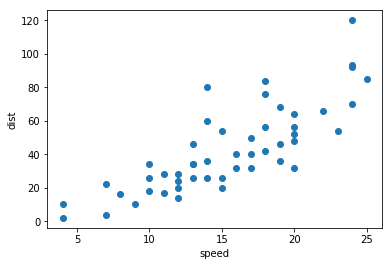

In [13]:
# 산점도(산포도, scatter plot)
plt.scatter(cars['speed'], cars['dist'])  # dist = distance 제동거리
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

In [14]:
# 상관계수
corr = np.corrcoef(cars['speed'], cars['dist'])[0, 1]
corr  # 피어슨 (0.1 ~ 1 : 강한 상관관계)

0.8068949006892103

In [ ]:
# 상관계수 검증  - 가설검증
데이터를 가지고 명확하게,,
이 결과가 확률적통계적으로 의미가 있는가

일부만 가지고 조사(표본조사) -> 샘플 데이터
머신러닝 -> 표본을 가지고 안함.. 모집단을 대상으로 함
         -> 전수조사
   
일반화의 오류 -> 트레이닝 시킨 데이터로 테스트 시키지 않는다.

차이검정 - 평균내서 비교,,?
  - t검정, 대응표본t검정, anova 등
    + 대응표본 -> 두번 반복해 샘플추출
    + 독립표본 -> 각각 샘플추출
    
요소간 관계파악(인과관계,상관관계)    
  - 상관분석 : 변수 사이 상관관계 이용해서 분석  / 관계가 있다없다
  - 회귀분석 : 관계를 모형화하여 분석            / 예측
              (독립변수-설명변수[속도], 종속변수-반응변수[제동거리])

가설채택
  인계가(인계값),p-value
  0.05 [마지노선] -> 95%의 신뢰구간

## 상관계수 검증

#### 상관계수의 값이 통계적으로 유의미한지를 검정하는 것
- 귀무가설 : 상관관계가 없다.
- 대립가설 : 상관관계가 있다.  
  
#### p-value : 통계의 유의성을 대표하는 지표
- 귀무가설에 대한 확률값
- 사회과학분야의 유의수준(알파값or임계값) : 0.05    즉, 95% 신뢰도
- 의생명분야의 유의수준 : 0.01   즉, 99%의 신뢰도
- p-value >= 0.05 : 대립가설 기각, 귀무가설 채택
- p-value < 0.05 : 대립가설 채택, 귀무가설 기각

In [15]:
import scipy.stats as stats
#corr, pValue = stats.pearsonr(cars['speed'], cars['dist'])  # 피어슨 상관계수
stats.pearsonr(cars['speed'], cars['dist'])             # 0.8 => 상관도가 높다
# 귀무가설 기각, 대립가설 채택 -> 통계적 의미가 있다 , 양의 상관관계

(0.8068949006892105, 1.4898364962950702e-12)

### 회귀분석(regression analysis)
- 수치형 종속변수와 수치형 독립변수 사이의 영향 또는 인과관계를 분석하는 방법
- 단순회귀분석(1개의 독립변수), 다중회귀분석(여러 개의 독립변수)
- 설명변수(독립변수)와 반응변수(종속변수)를 이용해서 값을 예측하는 모델링 기법
- 자동차의 속도에 따른 제동거리 : 제동거리(종속변수), 속도(독립변수)

   // 오차(잔차) 줄이는 방법 - 최소제곱법
   합리적이고 신뢰도 높은 모델링

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
# formula 표현식  : 종속변수 ~ 독립변수  / 단순회귀분석 // '.' = all
# 모델링 = 모델을 만드는 작업 
model = smf.ols(formula='dist ~ speed', data=cars)     # ols 최소제곱법
                                  # 관측값과 회귀선 사이의 잔차를 최소화
# 모델링 학습 fit()
result = model.fit()
result.summary()

# R-squared 결정계수 - 설명력, 학습의 효과 ... 0.651 은 좀 낮다..
# F-statistic 통계량 수치값 - 89.57  신뢰도 89%정도..

# P>|t|   : p-value
# 0.012  -> 0.05보다 낮음 -> 통계적으로 유의하다
# 0.000  -> 100%

# intercept - t  : 절편,,,,?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.49e-12
Time:                        14:23:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# 회귀방정식을 이용한 예측
# dist = 절편 x speed + 기울기
# 220 km/h 속도의 자동차 제동거리는?
distance = 3.9324 * 220 - 17.5791  # 절편: 3.9324, 속도:220, 기울기:-17.5791
distance                           # 제동거리

847.5488999999999

### 두 피처간의 상관분석

In [21]:
# beer_servings, wine_servings의 상관계수를 구한다.
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')  # 메서드 안써줘도됨,,
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [23]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


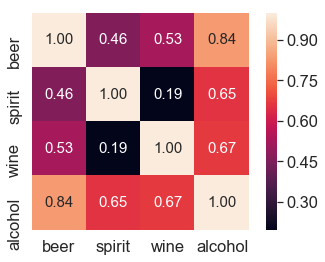

In [28]:
import seaborn as sns

# corr 행렬을 히트맵을 이용하여 시각화하는 작업
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,   # 데이터
                cbar = True,    # colorbar의 표시여부
                annot = True,   # 맵 상의 셀에 값 표시여부
                square = True,
                fmt =  '.2f',   # 서식
                annot_kws = {'size':15},  # 각셀에 적용.. 글씨 크기 15
                yticklabels = cols_view,  # 축 라벨
                xticklabels = cols_view)
plt.show()

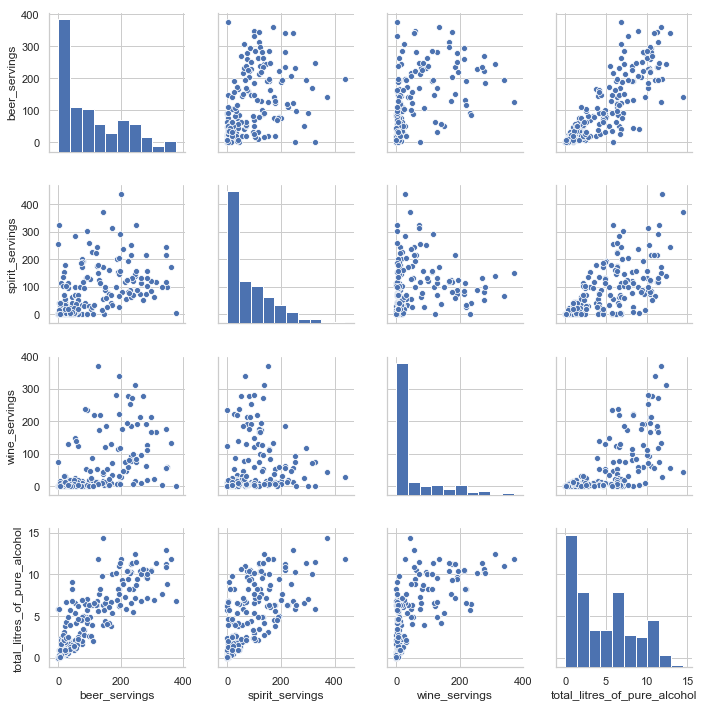

In [29]:
# 산점도 그래프 - 여러 개의 피처값을 이용해서 한 번에 시각화하는 도구
sns.set(style='whitegrid', context='notebook')  
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings',
                     'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

### step3. 탐색적 데이터분석

In [30]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [31]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [32]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [33]:
# 결측값을 어떻게 처리할것인지 분석하기
# continent 피처의 결측값 OT (Other)로 대체  # fillna
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [34]:
# 전체 데이터에서 특정 데이터의 분포를 분석하는 시각화 : pie-chart
drinks['continent'].value_counts()  # 시리즈타입, index-대륙, value-개수

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

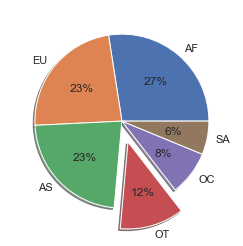

In [40]:
labels = drinks['continent'].value_counts().index.tolist()  # 라벨(대륙)
fracs = drinks['continent'].value_counts().values.tolist()  # 비율

explode = [0,0,0,0.25,0,0]

plt.pie(fracs, labels=labels, autopct='%.0f%%', explode=explode,   # .0f 소수점없앰
        shadow=True)
plt.show()  
# 결측값(OT)가 적은 비중을 차지하는 것이 아니라,, 버리지않는다..

In [41]:
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [42]:
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

In [43]:
# 대륙별 분석
# apply() : 하나의 함수를 통해 연산을 (반복)수행할 때 사용한다.
# agg() : 여러 개의 그룹함수를 이용하여 연산을 (반복)수행할 때 사용한다.

# 대륙별로 beer의 소비량에 대한 분석
result = drinks.groupby('continent').beer_servings.agg(['mean','min','max','sum'])
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


In [44]:
drinks.groupby('continent')['wine_servings'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


In [46]:
drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [48]:
drinks.groupby('continent').total_litres_of_pure_alcohol.agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,3.007547,0.0,9.1,159.4
AS,2.170455,0.0,11.5,95.5
EU,8.617778,0.0,14.4,387.8
OC,3.381250,0.0,10.4,54.1
OT,5.995652,2.2,11.9,137.9
SA,6.308333,3.8,8.3,75.7


In [56]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?
# total_litres_of_pure_alcohol 의 평균 ... 대륙별 평균.... 
# m = drinks.groupby('continent').total_litres_of_pure_alcohol.agg('mean').mean()
# c = drinks.groupby('continent').total_litres_of_pure_alcohol.agg('mean')
# print(c[c>=m])

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
result = continent_mean[continent_mean>=total_mean]
print(result)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [57]:
drinks.groupby('continent').total_litres_of_pure_alcohol.mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [63]:
# 평균 beer_servings이 가장 높은 대륙은 어디일까?
# idxmax() : 시리즈 객체에서 가장 큰 값을 갖는 인덱스를 반환해주는 함수
drinks.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

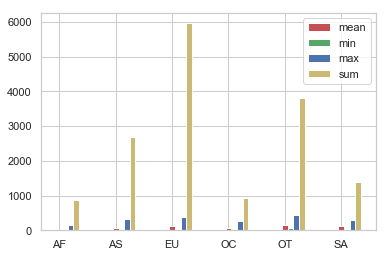

In [72]:
# 대륙별 spirit_servings의 평균, 최솟값, 최댓값, 합계를 시각화하는 작업
# k = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
# k.plot.bar(); plt.show()
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
n = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

x_pos = np.arange(n)
bar_width = 0.1 

ax = plt.bar(x_pos, means, bar_width, color='r', label='mean')
bx = plt.bar(x_pos+bar_width, mins, bar_width, color='g', label='min')
cx = plt.bar(x_pos+bar_width*2, maxs, bar_width, color='b', label='max')
dx = plt.bar(x_pos+bar_width*3, sums, bar_width, color='y', label='sum')

plt.xticks(x_pos, result.index.tolist())
plt.legend()
plt.show()


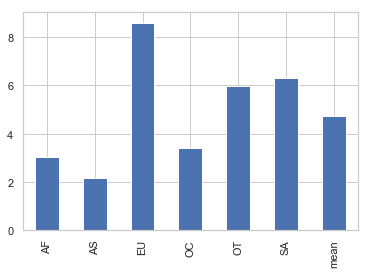

In [101]:
# # 대륙별 total_litres_of_pure_alcohol을 시각화
aa = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
mn = drinks['total_litres_of_pure_alcohol'].mean()
mn = pd.Series([mn], index=['mean'])
aa = aa.append(mn)
# print(type(aa), aa)
# meanx = plt.bar(color='r', label='mean')   #-> 빨간색 bar, 가로선 추가
aa.plot.bar()
plt.show()

In [92]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

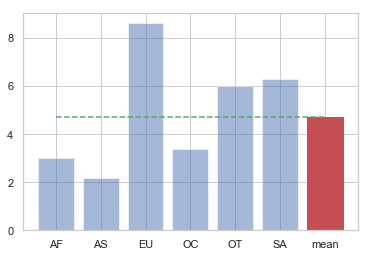

In [113]:
continents = continent_mean.index.tolist()  # ['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
continents.append('mean')
# continents
x_pos = np.arange(len(continents))
y_pos = continent_mean.tolist()
y_pos.append(total_mean)

bar_list = plt.bar(x_pos, y_pos, alpha=0.5)
bar_list[len(continents)-1].set_color('r')
bar_list[len(continents)-1].set_alpha(1)

plt.plot([0, 6], [total_mean, total_mean], 'g--')

plt.xticks(x_pos, continents)
plt.show()

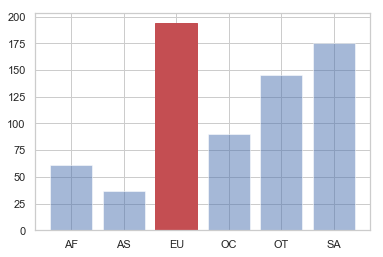

In [119]:
# 대륙별 beer_servings을 시각화하되, 
# 가장 많은 소비량을 보인 대륙의 색상을 빨간색으로 표시하시오.
continent_beer = drinks.groupby('continent').beer_servings.mean()
continent_beer.idxmax()

continents = continent_mean.index.tolist()

x_pos = np.arange(len(continents))
y_pos = continent_beer.tolist()

bar_list = plt.bar(x_pos, y_pos, alpha=0.5)
# bar_list[continents.index('EU')].set_color('r')
bar_list[continents.index(continent_beer.idxmax())].set_color('r')
bar_list[continents.index(continent_beer.idxmax())].set_alpha(1)

plt.xticks(x_pos, continents)
plt.show()

### step4. 통계적 데이터 분석

#### 카이제곱 검정

In [121]:
from scipy import stats
data1 = [4, 6, 17, 16, 8, 9]
data2 = [10, 10, 10, 10, 10, 10]

In [122]:
print(np.mean(data1))
print(np.mean(data2))

10.0
10.0


In [123]:
# 두 데이터가 통계적으로 같은지 다른지를 분석하는 카이제곱 검정
chis = stats.chisquare(data1, data2)     # chisquare 카이제곱
chis                              # statistic 통계량 , pvalue 

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

### 아프리카와 유럽 간 맥주 소비량의 차이검정

In [124]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [127]:
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

### 집단 간 평균 차이를 검정하는 T-검정
- 한 집단 평균 검정 : stats.ttest_1samp()         # T-test 1 sample
- 두 집단 평균 검정 : stats.ttest_ind(X, Y)
- 대응 두 집단 : before와 after의 변화, stats.ttest_rel(x, y)

In [128]:
tTest_result = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

# 등분산(동분산) : 두 집단의 분산이 같지 않을 경우  ...  크게 차이는 없다..
tTest_result2 = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'],
                               equal_var=False)

In [129]:
# 귀무가설 : 두 집단의 평균이 같다. p-value의 값은 귀무가설의 확률값
# 대립가설 : 두 집단의 평균이 같지 않다.
tTest_result             # p-value =  e-11...  >> 0.05보다 낮다..

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [130]:
tTest_result2

Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)

In [ ]:
# <과제>
# 대한민국의 알코올 소비량
# 얼마나 독하게 먹는지
